# The Battle Of Neigbhorhoods - Capstone Project


## 1. Introduction
### As the saying goes, New York city is the greatest city in the world. In addition to being financial and cultural center of the US, it is home to head quarters of international organizations such as United nations. Perhaps what makes New York City so special  is that its incredibly  culturally and ethnically diverse population.  Almost 200 languages spoken in the city().  This gives the city a “Cultural capital of the word” nickname.  It illustrates this melting pot of cultures through activities, museums, stores and restaurants. One can find variety of restaurants which serve international cuisines from India to Mexico, from China to Ethiopia all in not-so distant places.
### There are handful Ethiopian restaurants in New York City. Traditional Ethiopian cuisine is as distinctive as the country it comes from. A big part of the national identity, food runs deep through Ethiopia‘s ancient culture. Often intimate, always hands-on, it has a strong communal element that creates a dinnertime bond unlike anywhere else in the world. From hearty, tongue-tingling stews and all-purpose flatbread, to powerful home-brewed honey wine, there’s nothing quite like eating out in Ethiopia.()
### In this project I will try to explore  which neighborhoods and boroughs have how many Ethiopian Restaurants, where the highest rated restaurants are located. As a result I will explore which borough will be best to open Ethiopian restaurant.  Entrepreneurs  who want to open restaurant and curious food lovers who enjoy eating different international cuisines will be interetsted in this project.

## 2. Business Problem 
### i. How many Ethiopian Restuarants are in New York? which borough are they loacted in?
### ii. Whcih restuarants are highest rated?
### ii. Which boroughs will be best to open a restaurant?



## 3. Data 

###  New York City data containing the neighborhoods and boroughs, latitudes, and longitudes was obtained obtained from the data source: https://cocl.us/new_york_dataset
 
## 4. Methdology 
### Data  collected from https://cocl.us/new_york_dataset was cleaned and processed into a dataframe.
### Urlib module was used to fetch the data.
### Foursquare was utilized to locate all venue  catagories the catagories under 'Ethiopian Restaurant' is extracted and it was transformed to a new dataframe of Ethiopian restaurants  with respective ratings,number of  tips, and number likes.


In [3]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 


import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import urllib


from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium 
from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


In [4]:
url = " https://cocl.us/new_york_dataset"
req = urllib.request.Request(url)
response = urllib.request.urlopen(req)
data = response.read()
nyc_data= json.loads(data) 



In [97]:
nyc_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [5]:
neighborhoods_data = nyc_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
# define the dataframe columns
neighborhoods 

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


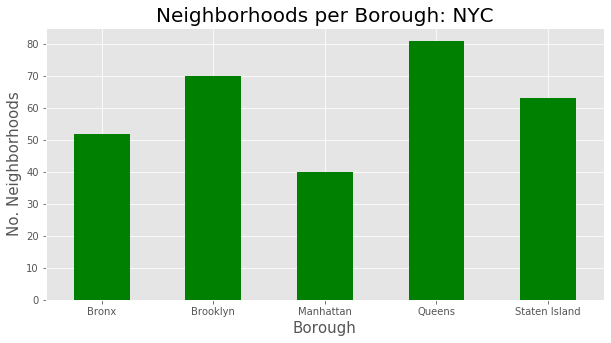

In [99]:
clr = "green"
neighborhoods.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()


In [100]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [101]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [110]:
CLIENT_ID = 'UDGM4KUSCGFGHH5HCH5OOSSHLOJXW4BM0IIKV000EBFUCT5I' 
CLIENT_SECRET = 'XTV4ARDERPWJRP01XCCUTALFT0WT4MYKSZZSIBCJ3GVAJYI0' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UDGM4KUSCGFGHH5HCH5OOSSHLOJXW4BM0IIKV000EBFUCT5I
CLIENT_SECRET:XTV4ARDERPWJRP01XCCUTALFT0WT4MYKSZZSIBCJ3GVAJYI0


In [111]:
neighborhoods.loc[0, 'Neighborhood']

'Wakefield'

In [112]:
neighborhood_latitude =neighborhoods .loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name


print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


In [113]:
LIMIT = 100

radius = 1000 # define radius
 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=UDGM4KUSCGFGHH5HCH5OOSSHLOJXW4BM0IIKV000EBFUCT5I&client_secret=XTV4ARDERPWJRP01XCCUTALFT0WT4MYKSZZSIBCJ3GVAJYI0&v=20180605&ll=40.89470517661,-73.84720052054902&radius=1000&limit=100'

In [114]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f0daaba1dc55400f91c8cea'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 49,
  'suggestedBounds': {'ne': {'lat': 40.903705185610015,
    'lng': -73.83531662200086},
   'sw': {'lat': 40.88570516760999, 'lng': -73.85908441909719}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'ln

In [115]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [116]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

In [117]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories','venue.id' ,'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,id,lat,lng
0,Lollipops Gelato,Dessert Shop,4c537892fd2ea593cb077a28,40.894123,-73.845892
1,Ripe Kitchen & Bar,Caribbean Restaurant,4d375ce799fe8eec99fd2355,40.898152,-73.838875
2,Ali's Roti Shop,Caribbean Restaurant,4c9e50e38afca09379b2ff15,40.894036,-73.856935
3,Jackie's West Indian Bakery,Caribbean Restaurant,4c10f6aece57c92804a682d2,40.889283,-73.843310
4,Carvel Ice Cream,Ice Cream Shop,4c783cef3badb1f7e4244b54,40.890487,-73.848568


In [118]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

49 venues were returned by Foursquare.


In [119]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'venue id',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [120]:
LIMIT =100
ny_venues = getNearbyVenues(names= neighborhoods['Neighborhood'],
                                   latitudes= neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )


Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

KeyError: 'groups'

In [121]:
Ethio_rest_ny = ny_venues[ny_venues['Venue Category']==  'Ethiopian Restaurant'].reset_index(drop=True)
Ethio_rest_ny

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,venue id,Venue Latitude,Venue Longitude,Venue Category
0,Cobble Hill,40.687920,-73.998561,Awash Ethiopian Restaurant,4fbc1488e4b04e551e0c3a57,40.685740,-73.994393,Ethiopian Restaurant
1,Fort Greene,40.688527,-73.972906,Bati Ethiopian Restaurant,4ac3e617f964a520599d20e3,40.686599,-73.974876,Ethiopian Restaurant
2,Central Harlem,40.815976,-73.943211,Abyssinia Restaurant,4f777eb7e4b055c760bb7d39,40.816308,-73.946054,Ethiopian Restaurant
3,Clinton,40.759101,-73.996119,Queen of Sheba,42dc4280f964a52039261fe3,40.762053,-73.993609,Ethiopian Restaurant
4,Morningside Heights,40.808000,-73.963896,Massawa,4e7384b7fa76812398e4295b,40.809909,-73.958806,Ethiopian Restaurant


In [122]:
Ethio_rest_ny=    pd.merge(Ethio_rest_ny, neighborhoods, on= 'Neighborhood')
Ethio_rest_ny

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,venue id,Venue Latitude,Venue Longitude,Venue Category,Borough,Latitude,Longitude
0,Cobble Hill,40.687920,-73.998561,Awash Ethiopian Restaurant,4fbc1488e4b04e551e0c3a57,40.685740,-73.994393,Ethiopian Restaurant,Brooklyn,40.687920,-73.998561
1,Fort Greene,40.688527,-73.972906,Bati Ethiopian Restaurant,4ac3e617f964a520599d20e3,40.686599,-73.974876,Ethiopian Restaurant,Brooklyn,40.688527,-73.972906
2,Central Harlem,40.815976,-73.943211,Abyssinia Restaurant,4f777eb7e4b055c760bb7d39,40.816308,-73.946054,Ethiopian Restaurant,Manhattan,40.815976,-73.943211
3,Clinton,40.759101,-73.996119,Queen of Sheba,42dc4280f964a52039261fe3,40.762053,-73.993609,Ethiopian Restaurant,Manhattan,40.759101,-73.996119
4,Morningside Heights,40.808000,-73.963896,Massawa,4e7384b7fa76812398e4295b,40.809909,-73.958806,Ethiopian Restaurant,Manhattan,40.808000,-73.963896


## 5.Result

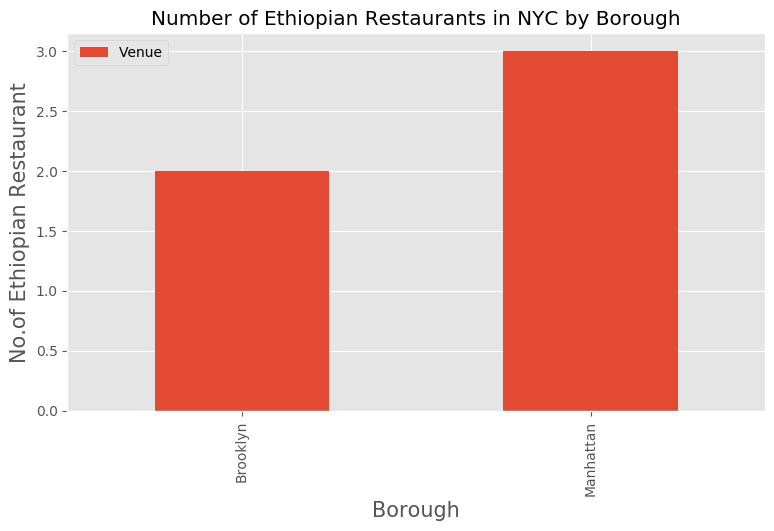

In [125]:
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Ethiopian Restaurants in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Ethiopian Restaurant', fontsize=15)
#giving a bar plot
Ethio_rest_ny.groupby('Borough')['Venue'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()


In [126]:
venue_id = '4fbc1488e4b04e551e0c3a57'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url


'https://api.foursquare.com/v2/venues/4fbc1488e4b04e551e0c3a57?client_id=UDGM4KUSCGFGHH5HCH5OOSSHLOJXW4BM0IIKV000EBFUCT5I&client_secret=XTV4ARDERPWJRP01XCCUTALFT0WT4MYKSZZSIBCJ3GVAJYI0&v=20180605'

In [127]:
result = requests.get(url).json()
result['response']['venue']
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

8.2


In [134]:
venues_ids= Ethio_rest_ny['venue id']
venue_details=[]
for venue_id in venues_ids.values.tolist():
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        
        venue_rating=result['response']['venue']['rating']
        venue_likes=result['response']['venue']['likes']['count']
        venue_tips=result['response']['venue']['tips']['count']
        venue_details.append([venue_id, venue_rating, venue_likes, venue_tips])
      
    except IndexError:
        print('No data available for id=',ID)
        
venue_details

column_names=[ 'venue id','Rating','likes','Tips']
df = pd.DataFrame(venue_details,columns=column_names)
df

,venue id,Rating,likes,Tips
0,4fbc1488e4b04e551e0c3a57,8.2,80,30
1,4ac3e617f964a520599d20e3,8.1,94,35
2,4f777eb7e4b055c760bb7d39,8.6,51,11
3,42dc4280f964a52039261fe3,7.9,164,55
4,4e7384b7fa76812398e4295b,6.4,49,28


In [141]:
Ethio_detail_ny = pd.merge(Ethio_rest_ny, df, on='venue id')
Ethio_detail_ny

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,venue id,Venue Latitude,Venue Longitude,Venue Category,Borough,Latitude,Longitude,Rating,likes,Tips
0,Cobble Hill,40.687920,-73.998561,Awash Ethiopian Restaurant,4fbc1488e4b04e551e0c3a57,40.685740,-73.994393,Ethiopian Restaurant,Brooklyn,40.687920,-73.998561,8.2,80,30
1,Fort Greene,40.688527,-73.972906,Bati Ethiopian Restaurant,4ac3e617f964a520599d20e3,40.686599,-73.974876,Ethiopian Restaurant,Brooklyn,40.688527,-73.972906,8.1,94,35
2,Central Harlem,40.815976,-73.943211,Abyssinia Restaurant,4f777eb7e4b055c760bb7d39,40.816308,-73.946054,Ethiopian Restaurant,Manhattan,40.815976,-73.943211,8.6,51,11
3,Clinton,40.759101,-73.996119,Queen of Sheba,42dc4280f964a52039261fe3,40.762053,-73.993609,Ethiopian Restaurant,Manhattan,40.759101,-73.996119,7.9,164,55
4,Morningside Heights,40.808000,-73.963896,Massawa,4e7384b7fa76812398e4295b,40.809909,-73.958806,Ethiopian Restaurant,Manhattan,40.808000,-73.963896,6.4,49,28


In [142]:
Ethio_detail_nyc = Ethio_detail_ny[['Venue', 'Rating', 'Borough', 'likes', 'Tips']]
Ethio_detail_nyc

,Venue,Rating,Borough,likes,Tips
0,Awash Ethiopian Restaurant,8.2,Brooklyn,80,30
1,Bati Ethiopian Restaurant,8.1,Brooklyn,94,35
2,Abyssinia Restaurant,8.6,Manhattan,51,11
3,Queen of Sheba,7.9,Manhattan,164,55
4,Massawa,6.4,Manhattan,49,28


## 6. Discussion and Conclusion
#### Of the 5 venues under "Ethiopian Restaurant" Venue-category, three of them are located in Manhattan and two in Brooklyn. Bronx, Queens and Staten Island have no venue under that category. "Abyssinia Restaurant" which is located in Manhattan is the highest rated and  "Queen of Sheba" which is also located in Manhattan is with the most number of "likes".
#### As mentioned in the business problem, there are two kinds of target audiences: food lovers and entrepreneurs. 
#### For entrepreneurs who want to open an Ethiopian Restaurant, it is recommended they choose Bronx, Queens, or Staten Islands as there are no Ethiopian restaurants there. and for the food lovers who want test Ethiopian food, it is recommended they go to Manhattan as the highest-rated Ethiopian restaurant and Ethiopian restaurant with the most number of 'likes' are located there.

https://medium.com/@shibetmas/capstone-project-the-battle-of-neighborhoods-62c0bbb0c093